In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib created a temporary cache directory at C:\Users\Dell\AppData\Local\Temp\matplotlib-axz4suhn because the default path (C:\Users\Dell\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('data/housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100

print(missing_values)
print(missing_percentage)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [4]:
data = data.dropna()
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

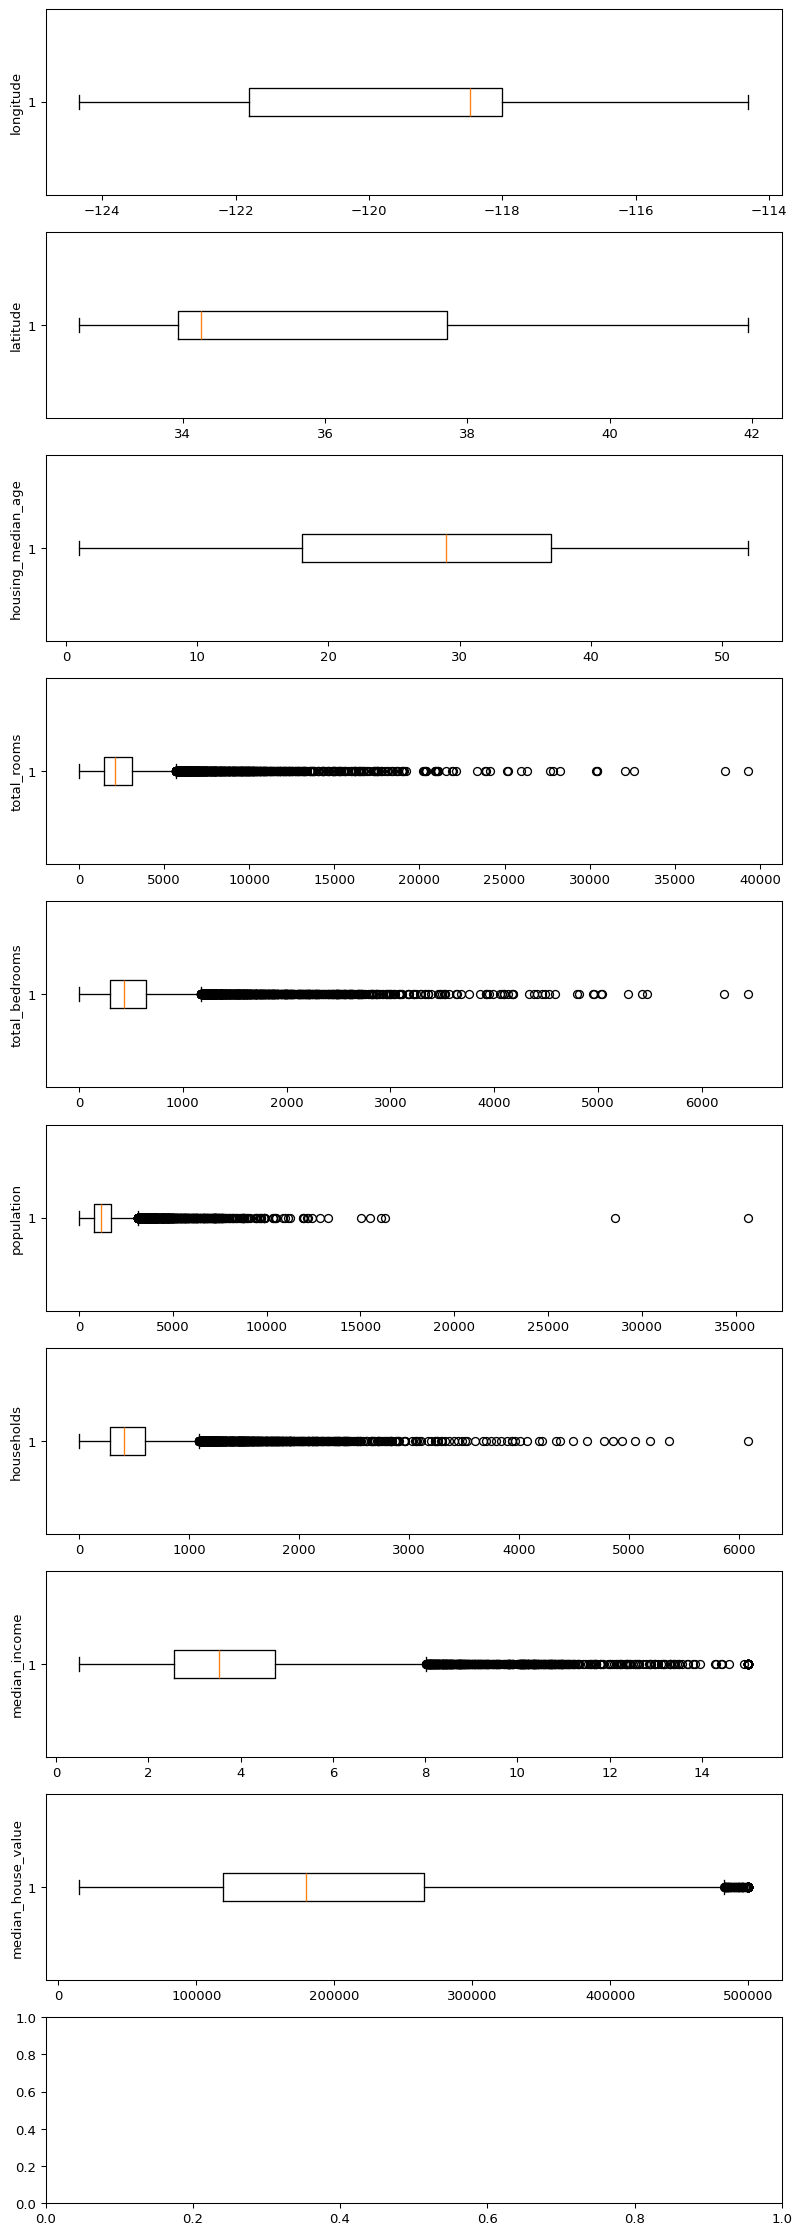

In [5]:
column_number = len(data.columns)
fig, axs = plt.subplots(column_number, 1, dpi=95, figsize=(10, 30))
i = 0
for col in data.columns:
    if data[col].dtype != 'object':
        axs[i].boxplot(x=data[col], vert=False)
        axs[i].set_ylabel(col)
        i += 1
plt.show()

In [6]:
data.shape

(20433, 10)

In [7]:
for col in data.columns:
    if data[col].dtype == 'object':
        continue
    Q1 = data['median_income'].quantile(0.25)
    Q3 = data['median_income'].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data['median_income'] >= lower_bound) & (data['median_income'] <= upper_bound)]

data.shape

(19557, 10)

In [8]:
displayed_data = data.drop('ocean_proximity', axis=1)

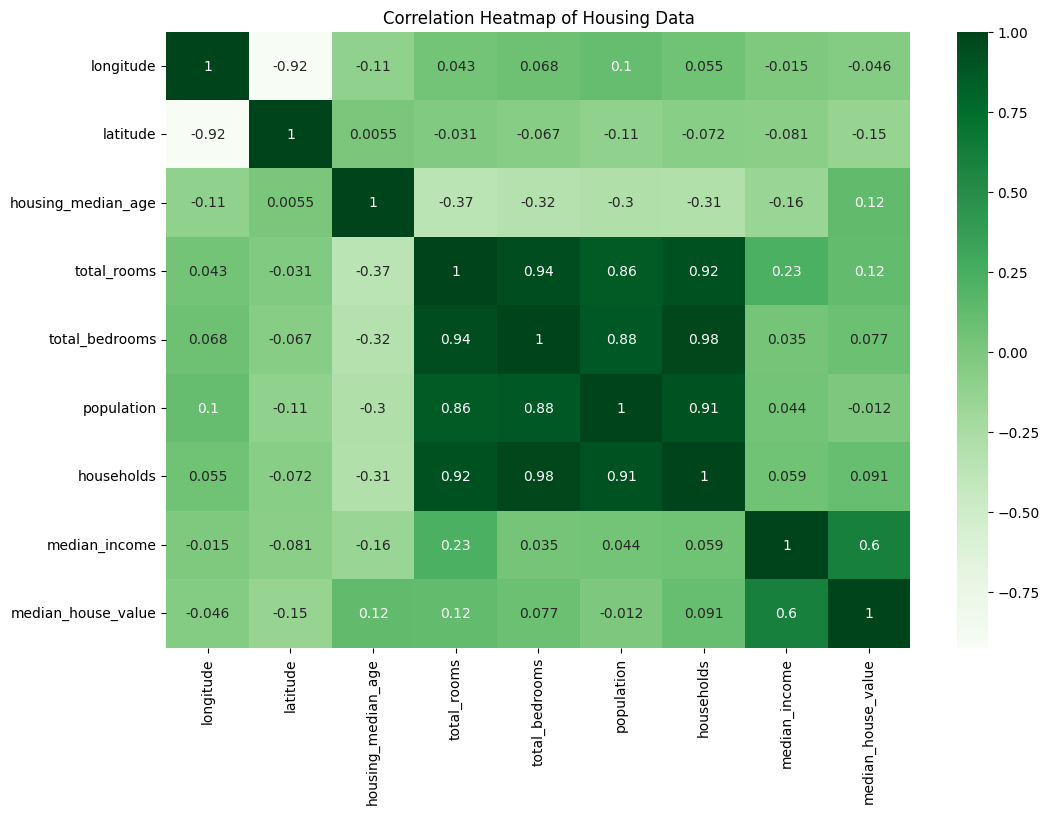

In [9]:
def show_heatmap(data):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='Greens')
    plt.title('Correlation Heatmap of Housing Data')
    plt.show()

show_heatmap(displayed_data)

In [10]:
data = data.drop('households', axis=1)
displayed_data = data.drop('ocean_proximity', axis=1)

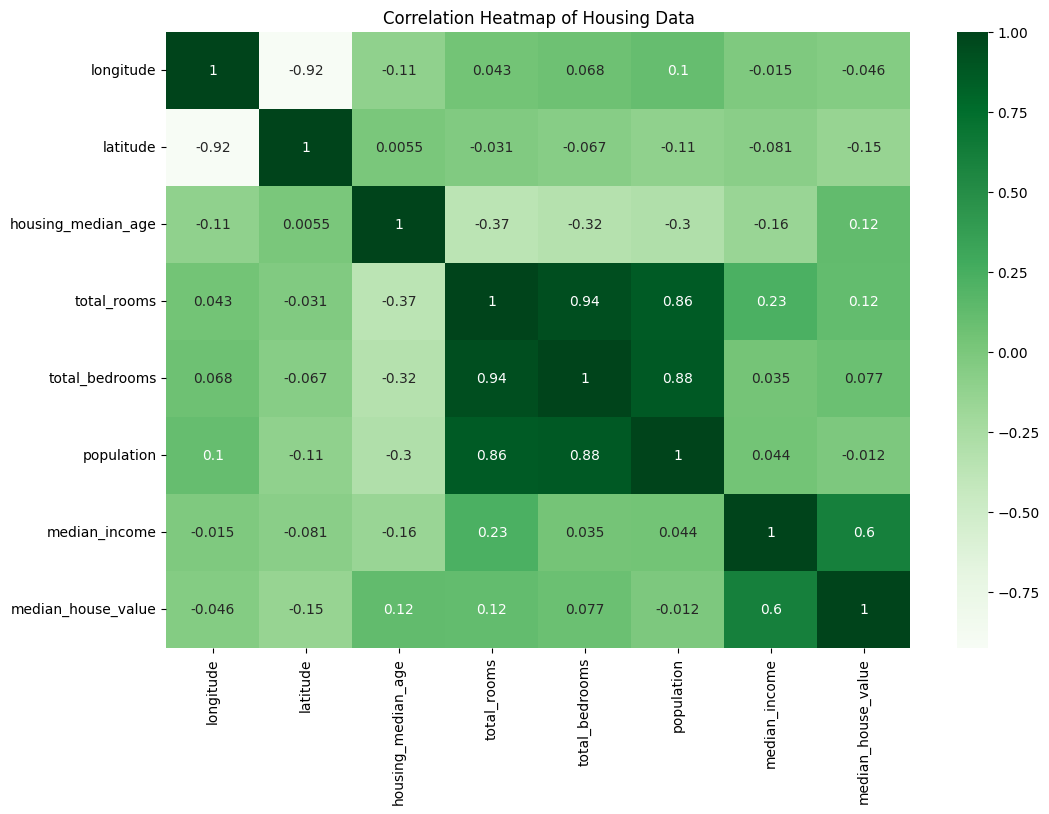

In [11]:
show_heatmap(displayed_data)

In [12]:
data = data.drop('total_bedrooms', axis=1)
displayed_data = data.drop('ocean_proximity', axis=1)

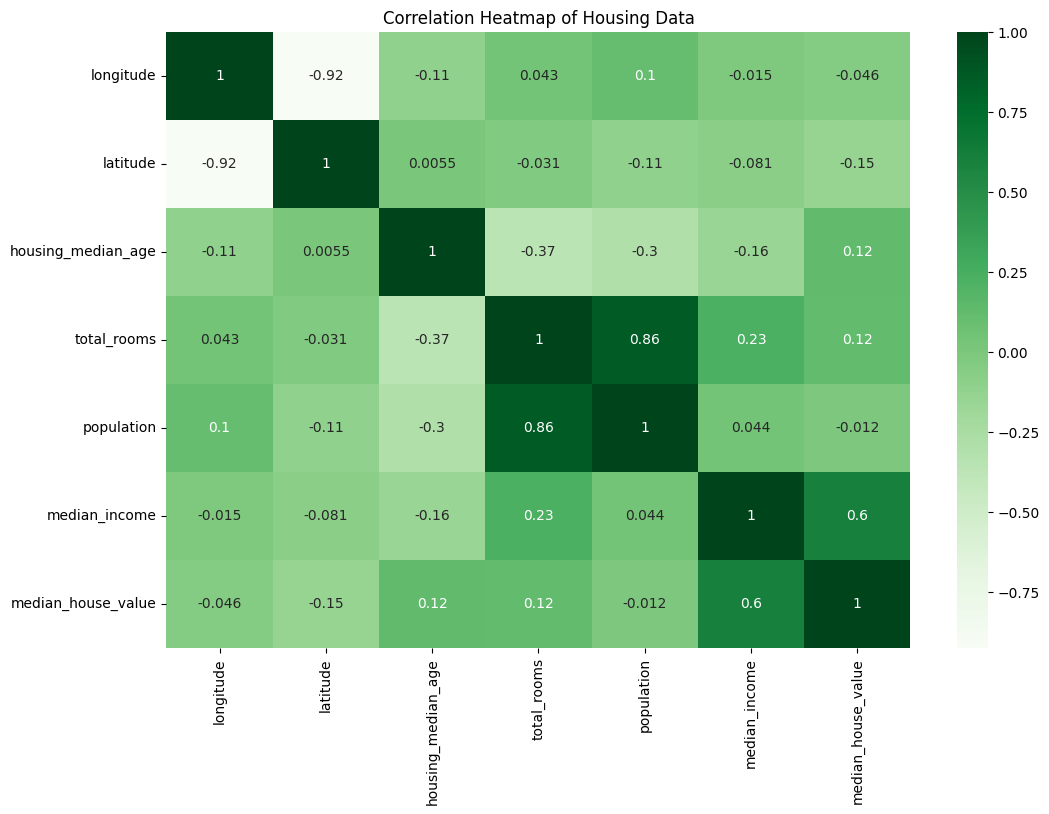

In [13]:
show_heatmap(displayed_data)

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['ocean_proximity'] = encoder.fit_transform(data['ocean_proximity'])
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,413.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,1094.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,1157.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,1206.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,1551.0,3.6912,261100.0,3
10,-122.26,37.85,52.0,2202.0,910.0,3.2031,281500.0,3
11,-122.26,37.85,52.0,3503.0,1504.0,3.2705,241800.0,3


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19557 entries, 2 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19557 non-null  float64
 1   latitude            19557 non-null  float64
 2   housing_median_age  19557 non-null  float64
 3   total_rooms         19557 non-null  float64
 4   population          19557 non-null  float64
 5   median_income       19557 non-null  float64
 6   median_house_value  19557 non-null  float64
 7   ocean_proximity     19557 non-null  int32  
dtypes: float64(7), int32(1)
memory usage: 1.3 MB


In [16]:
data.nunique()

longitude               843
latitude                861
housing_median_age       52
total_rooms            5755
population             3842
median_income         12013
median_house_value     3716
ocean_proximity           5
dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,19557.0,-119.568075,2.004539,-124.3500,-121.7700,-118.4900,-118.0100,-114.3100
latitude,19557.0,35.648141,2.147496,32.5400,33.9300,34.2700,37.7300,41.9500
housing_median_age,19557.0,28.693153,12.535259,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,19557.0,2605.543642,2147.002923,2.0000,1440.0000,2107.0000,3109.0000,39320.0000
population,19557.0,1432.530449,1133.505693,3.0000,793.0000,1173.0000,1732.0000,35682.0000
median_income,19557.0,3.615192,1.435033,0.4999,2.5263,3.4459,4.5533,7.5925
median_house_value,19557.0,196056.883162,104591.777242,14999.0000,116700.0000,174200.0000,250000.0000,500001.0000
ocean_proximity,19557.0,1.164289,1.410469,0.0000,0.0000,1.0000,1.0000,4.0000


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in data.columns:
    if col in ['median_house_value', 'ocean_proximity']:
        continue
    data[col] = scaler.fit_transform(data[[col]])

data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,19557.0,-2.162474e-15,1.000026,-2.385610,-1.098498,0.537831,0.777293,2.623152
latitude,19557.0,1.813688e-15,1.000026,-1.447370,-0.800088,-0.641760,0.969460,2.934590
housing_median_age,19557.0,-3.487861e-17,1.000026,-2.209277,-0.853068,0.024479,0.662695,1.859351
total_rooms,19557.0,-2.179913e-17,1.000026,-1.212672,-0.542884,-0.232210,0.234499,17.100766
population,19557.0,-2.034586e-17,1.000026,-1.261191,-0.564220,-0.228968,0.264204,30.216297
median_income,19557.0,3.604123e-16,1.000026,-2.170940,-0.758811,-0.117973,0.653736,2.771651
median_house_value,19557.0,1.960569e+05,104591.777242,14999.000000,116700.000000,174200.000000,250000.000000,500001.000000
ocean_proximity,19557.0,1.164289e+00,1.410469,0.000000,0.000000,1.000000,1.000000,4.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19557 entries, 2 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19557 non-null  float64
 1   latitude            19557 non-null  float64
 2   housing_median_age  19557 non-null  float64
 3   total_rooms         19557 non-null  float64
 4   population          19557 non-null  float64
 5   median_income       19557 non-null  float64
 6   median_house_value  19557 non-null  float64
 7   ocean_proximity     19557 non-null  int32  
dtypes: float64(7), int32(1)
memory usage: 1.3 MB


In [20]:
from sklearn.model_selection import train_test_split

x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

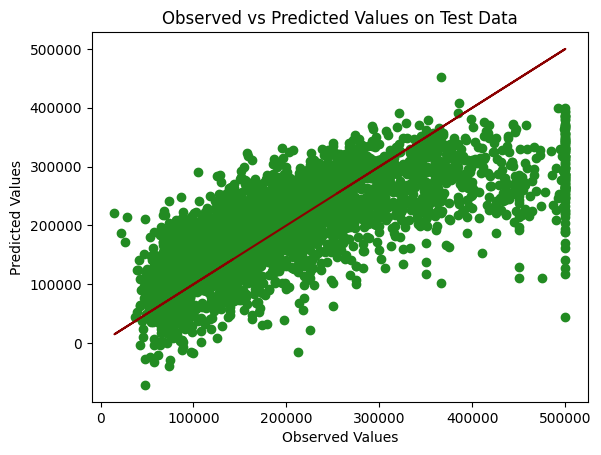

In [22]:
plt.scatter(y_test, predictions, color='forestgreen')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

score = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(mse)
print(mae)
print(score)

5394124503.934337
54331.08382771089
0.5209997496581864


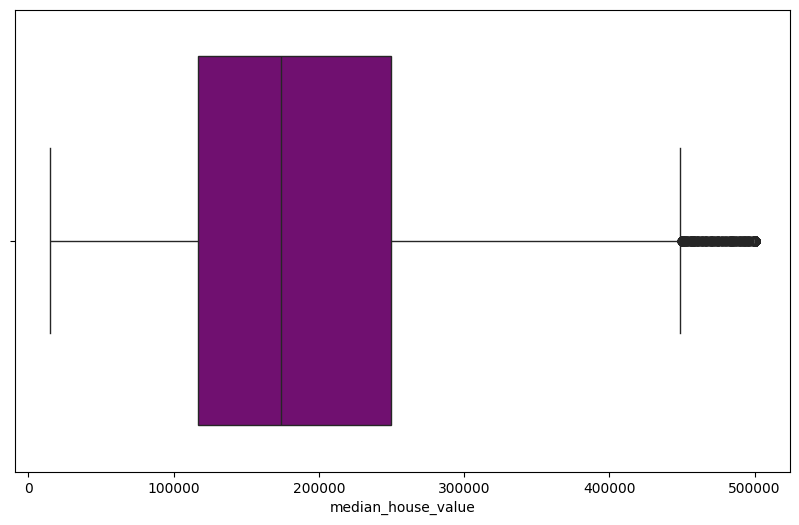

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['median_house_value'], color='purple')
plt.show()

In [25]:
Q1 = data['median_house_value'].quantile(0.25)
Q3 = data['median_house_value'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['median_house_value'] >= lower_bound) & (data['median_house_value'] <= upper_bound)]

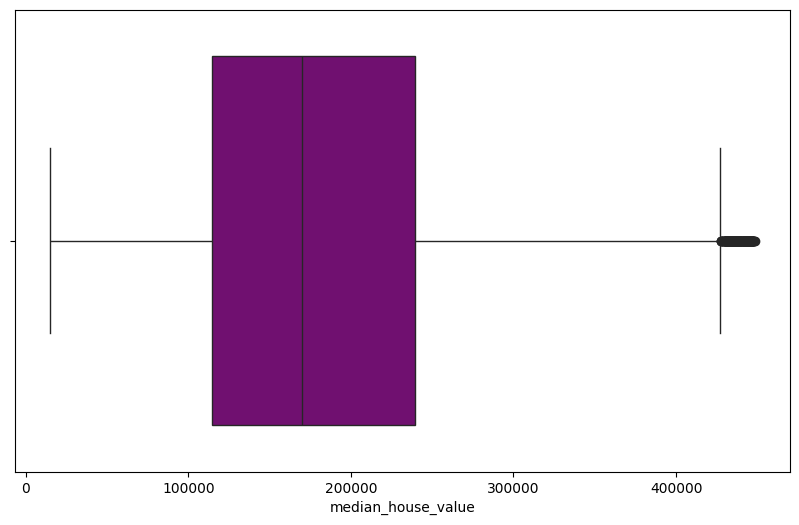

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['median_house_value'], color='purple')
plt.show()

In [27]:
upper_bound

449950.0

In [28]:
data['median_house_value'].value_counts()

median_house_value
137500.0    118
162500.0    116
112500.0    101
187500.0     92
225000.0     89
           ... 
436800.0      1
279000.0      1
300400.0      1
389800.0      1
47000.0       1
Name: count, Length: 3574, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

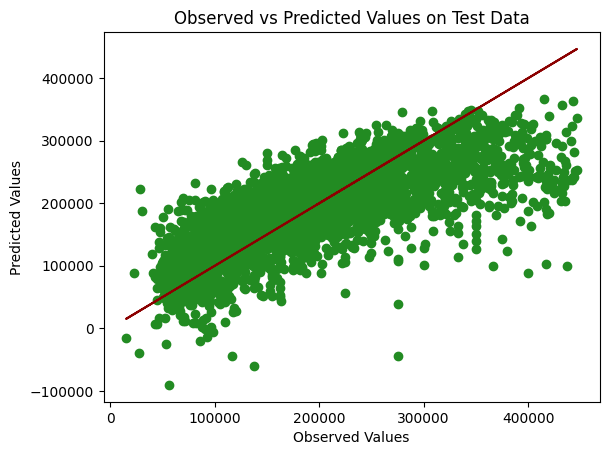

In [31]:
plt.scatter(y_test, predictions, color='forestgreen')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

score = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(mse)
print(mae)
print(score)

3539235540.75128
44884.64009378503
0.5490164734698448


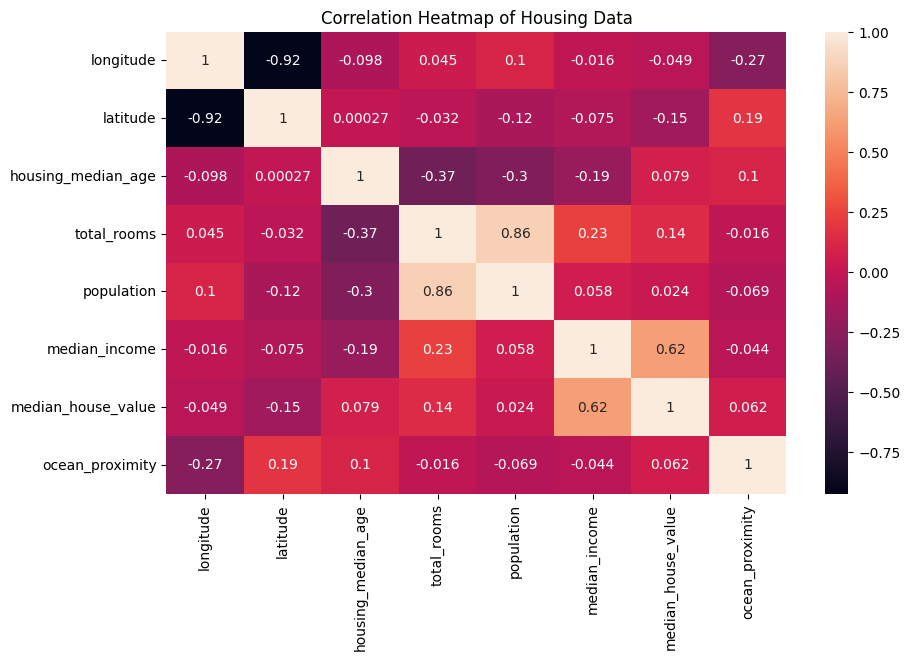

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='rocket')
plt.title('Correlation Heatmap of Housing Data')
plt.show()